In [1]:
import numpy as np
from scipy.optimize import curve_fit
from scipy import odr
import pandas as pd
from uncertainties import ufloat
import seaborn as sns
import matplotlib.pyplot as plt

it parameter 1-sigma error
———————————–
0.003732274293241976 +- 0.00013043325240102405
0.19870257793121637 +- 0.00034575258455909195


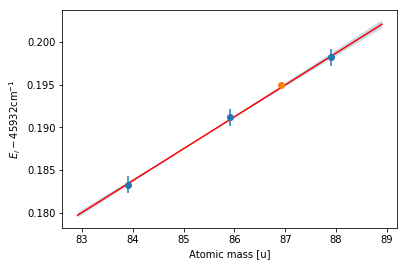

45932.19870+/-0.00035


In [4]:
# Plot of ionization energy vs. mass

def func(p, x):
    m, b = p
    return m*x + b

data = pd.DataFrame({'isotope' : [84, 86, 88],
                     'm'       : [83.9134191, 85.9092606, 87.9056125],
                     'dm'      : [0.0000013, 0.0000012, 0.0000012],
                     'Eion'    : [45932.1833, 45932.1912, 45932.1982],
                     'dEion'   : [0.0010, 0.0010, 0.0010]})
offset = 45932
mass_offset = 88
x = data.m - mass_offset
dx = data.dm
y = data.Eion-offset
dy = data.dEion

lin_model = odr.Model(func)
data = odr.RealData(x, y, sx=dx, sy=dy)

odrfit = odr.ODR(data, lin_model, beta0=[0.004, -0.13])
out = odrfit.run()

#print fit parameters and 1-sigma estimates
popt = out.beta
perr = out.sd_beta
print('it parameter 1-sigma error')
print('———————————–')
for i in range(len(popt)):
    print(str(popt[i])+' +- '+str(perr[i]))

# prepare confidence level curves
nstd = 1. # to draw 5-sigma intervals
popt_up = popt + nstd * perr
popt_dw = popt - nstd * perr

x_fit = np.linspace(min(x)-1, max(x)+1, 100)
y_fit = func(popt, x_fit)
fit_up = func(popt_up, x_fit)
fit_dw = func(popt_dw, x_fit)

fig, ax = plt.subplots(1)

plt.errorbar(x + mass_offset, y, xerr=dx, yerr = dy, fmt='o')
plt.plot(x_fit + mass_offset, y_fit, 'r')
ax.fill_between(x_fit + mass_offset, fit_up, fit_dw, alpha=.25, label='5-sigma interval')
plt.xlabel('Atomic mass [u]')
plt.ylabel(r'$E_i - 45932\rm{cm^{-1}}$')

plt.errorbar(86.9088775, 45932.19497-offset, xerr=0.0000012, yerr = 0.00022, fmt='o')

plt.savefig('Eion-mass-scaled.svg', bbox_inches='tight')
plt.show()

print(ufloat(0.19870257793121637+offset,0.00034575258455909195))

In [205]:
Ei87 = 45932 + func(popt, -1)
Ei87up = 45932 + func(popt_up, -1) - Ei87
Ei87dw = 45932 + func(popt_dw, -1) - Ei87

print('E_i for 87Sr: ' + str(Ei87))
print('+ ' + str(Ei87up))
print('- ' + str(Ei87dw))
print(ufloat(Ei87, Ei87up))

E_i for 87Sr: 45932.19497030364
+ 0.00021531933452934027
- -0.00021531933452934027
45932.19497+/-0.00022


In [222]:
# Ionization limit by subtracting F=4 HF shift from reported values
SoL = 299792458                  #[m/s] speed of light

Ei87 = ufloat(45932.2861,0.0010) #[/cm]
A = ufloat(-1000473.673,0.011)   #[/kHz] 87Sr hyperfine constant for 5s
A = A*(10)/SoL
S = 1/2
F = 4
I = 9/2
EF4 = (A/2)*(F*(F+1) - I*(I+1) - S*(S+1))
print(Ei87)
print(Ei87 - EF4)

45932.2861+/-0.0010
45932.1943+/-0.0010
